<a href="https://colab.research.google.com/github/francotestori/aauba_01/blob/master/Copia_de_Copia_de_AAUBA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático
## Trabajo Práctico 1

El objetivo de este trabajo práctico es el desarrollo de una solución que permita predecir la cancelación de una reserva utilizando como dataset el archivo provisto por la catedra ***'hotel_bookins.csv'***.

In [0]:
# Cargar el archivo original de bookings
!wget https://raw.githubusercontent.com/francotestori/aauba_01/master/resources/hotel_bookings.csv

--2020-05-25 16:16:53--  https://raw.githubusercontent.com/francotestori/aauba_01/master/resources/hotel_bookings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotel_bookings.csv’

hotel_bookings.csv  100%[===================>]  16.07M  43.4MB/s    in 0.4s    

2020-05-25 16:16:54 (43.4 MB/s) - ‘hotel_bookings.csv’ saved [16855599/16855599]



In [0]:
# Inicializar el dataframe
import pandas as pd
import numpy as np

bookings_df = pd.read_csv('hotel_bookings.csv')
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## a. Descripción de los atributos

#### Atributos

In [0]:
bookings_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Descripción de los que contienen números

In [0]:
bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Atributos, descripción y clasificación

* hotel: Qué hotel. Categórica
* is_canceled: Si fue cancelada o no, bool booleana. Categórica (Variable a predecir)
* lead_time: Período de tiempo en días entre reserva y check-in. Numérica, discreta.
* arrival_date_year: Año de arribo. Numérica, discreta.
* arrival_date_week_number:Semana de arribo. Ordinal.
* arrival_date_day_of_month:Día de arribo. Ordinal.
* stays_in_weekend_nights: Días de Stay en fin de semana. Numérica, discreta.
* stays_in_week_nights: Días de Stay en días de semana. Numérica, discreta.	
* adults: Cantidad de adultos.	Numérica, discreta.	
* children:	Cantidad de niños.	Numérica, discreta.	
* babies: Cantidad de Bebés.	Numérica, discreta.	
* meals: Tipo de servicio de comida. Categórica.
* country: País. Categórica.
* market_segment: Tipo de canal. Categórica.
* distribution_channel: Canal de venta(operación de venta). Categórica.
* is_repeated_guest: Ya fue huésped.bool booleana. Categórica.
* previous_cancellations: Cantidad de cancelaciones con anterioridad. Numérica, discreta.	
* previous_bookings_not_canceled: Cantidad de reservas no canceladas. Numérica, discreta.
* reserved_room_type: Tipo de habitación reservada. Categórica.
* assigned_room_type: Tipo de habitación asignada. Categórica.
* booking_changes: Cantidad de cambios de reserva.  Numérica, discreta.
* deposit_type: Tipo de depósito. Categórica. 
* agent: Número del agente de venta. Categórica. 
* company: Número de la compañía. Categórica.  
* days_in_waiting_list: Cantidad de días en lista de espera. Numérica, discreta.
* customer_type: Tipo de cliente. Categórica.
* adr: Average daily rate, ingresos dividido habitaciones vendidas. Numérica.
* required_car_parking_spaces: Cantidad de lugares de estacionamiento requeridos.Numérica, discreta.
* total_of_special_requests: Cantidad de pedidos especiales.Numérica, discreta.
* reservation_status: Estado de la reserva. Categórica.
* reservation_status_date: Fecha de estado de reserva. Categórica.


#### Posibles valores y frecuencia de los no numéricos

In [0]:
for i in range(len(bookings_df.columns)):
  print(bookings_df[bookings_df.columns[i]].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
0    75166
1    44224
Name: is_canceled, dtype: int64
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36

## b. Valores faltantes

In [0]:
bookings_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Contamos con faltantes en los siguientes atributos:
* children: Son muy pocos casos, 4. 
* country: Pocos casos sería posible con alguna medida de cercanía.
* agent: Relativamente grande número de faltantes, 15%.
* company: Número demasiado grande de faltantes, aprox 90%.

Es posible imputar el valor más común del atributo, el más común de la clasificación o asignar una probabilidad en base a las frecuencias observadas(este último no lo encuentro muy aplicable).




## c. Variables correlacionadas

In [0]:
corr=bookings_df.corr()
abs(corr.iloc[0,]).sort_values(ascending=False).head

<bound method NDFrame.head of is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64>

Las cuatro variables más correlacionadas son:

* lead_time                      0.293123
* total_of_special_requests      0.234658
* required_car_parking_spaces    0.195498
* booking_changes                0.144381

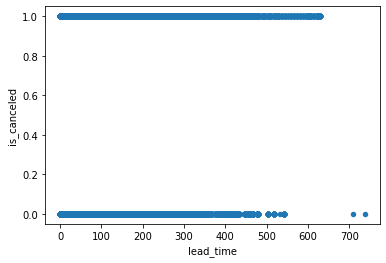

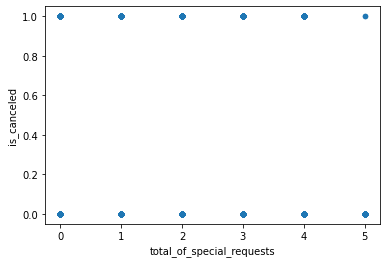

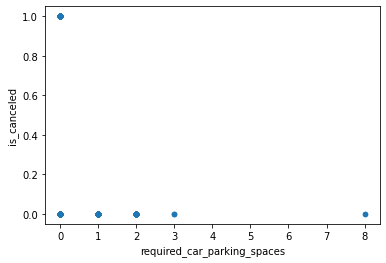

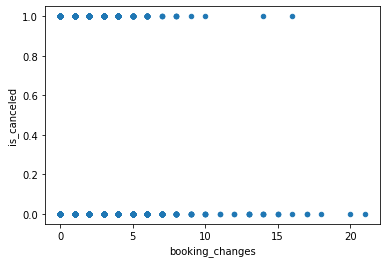

In [0]:
bookings_df.plot.scatter('lead_time','is_canceled')
bookings_df.plot.scatter('total_of_special_requests','is_canceled')
bookings_df.plot.scatter('required_car_parking_spaces','is_canceled')
bookings_df.plot.scatter('booking_changes','is_canceled')

## d. Atributos a emplear como variables predictoras para cancelación, con antelación.

Las variables de mayor correlación que tenemos con antelación son:
* lead_time                      0.293123
* total_of_special_requests      0.234658
* required_car_parking_spaces    0.195498
* previous_cancellations         0.110133
* is_repeated_guest              0.084793


La siguiente variable podríamos no tener información completa hasta que llegue el momento de check-in
* booking_changes                0.144381




Por ver las categóricas con la teoría de árboles.

In [0]:
pip install info_gain

In [0]:
from info_gain import info_gain
ig=pd.DataFrame(columns=['Atributo', 'Information Gain ratio'])
for i in range(len(bookings_df.columns)):
  print(bookings_df.columns[i],info_gain.info_gain_ratio(bookings_df.iloc[0:31,1],bookings_df.iloc[0:31,i]))  
  ig.iloc[i]=[bookings_df.columns[i]]+[info_gain.info_gain_ratio(bookings_df.iloc[0:31,1],bookings_df.iloc[0:31,i])]



hotel nan


/usr/local/lib/python3.6/dist-packages/info_gain/info_gain.py:157: RuntimeWarning: invalid value encountered in double_scalars
  return info_gain(Ex, a, nan) / intrinsic_value(Ex, a, nan)


IndexError: ignored

In [0]:
ig=pd.DataFrame(columns=['Atributo', 'Information Gain ratio'])
ig.append(['1','10'])
print(ig)

Empty DataFrame
Columns: [Atributo, Information Gain ratio]
Index: []


## e. Se encuentra balanceado el set
Hay casi el doble de reservas no canceladas frente a las canceladas.

Todavía no lo vimos en clase.
